## Solving TicTacToe with Minimax

In [67]:
s_to_b = {0:'__',1:'X',2:'O'} 

We will denote the state of a game using a tuple of length 9.For example:

In [68]:
state = (1,0,0,2,0,0,0,0,0)

In [69]:
def state_to_board(state):
    "Function to convert a a state(tuple) to a board(numpy array)"
    board = np.array([s_to_b[position] for position in state])
    return board.reshape(3,3)
    

In [70]:
max_player_wins = (1,1,1)
min_player_wins = (2,2,2)

A terminal state is reached if one of the players wins or if the board is fully occupied in which case the game is tied.<br>
We will set the score of the game as follows: <br>
X wins: + 10 <br>
O wins: -10 <br>
Draw: 0

In [71]:
def is_terminal(state):
    
    if  state[slice(0,3)] == max_player_wins:
        return True,10
    elif state[slice(0,3)] == min_player_wins:
        return True,-10
    elif state[slice(3,6)] == max_player_wins:
        return True,10
    elif state[slice(3,6)] == min_player_wins:
        return True,-10
    elif state[slice(6,9)] == max_player_wins:
        return True,10
    elif state[slice(6,9)] == min_player_wins:
        return True,-10
    elif state[slice(0,7,3)] == max_player_wins:
        return True,10
    elif state[slice(0,7,3)] == min_player_wins:
        return True,-10
    elif state[slice(1,8,3)] == max_player_wins:
        return True,10
    elif state[slice(1,8,3)] == min_player_wins:
        return True,-10
    elif state[slice(2,9,3)] == max_player_wins:
        return True,10
    elif state[slice(2,9,3)] == min_player_wins:
        return True,-10
    elif state[slice(0,9,4)] == max_player_wins:
        return True,10
    elif state[slice(0,9,4)] == min_player_wins:
        return True,-10
    elif state[slice(2,7,2)] == max_player_wins:
        return True,10
    elif state[slice(2,7,2)] == min_player_wins:
        return True,-10
    elif state.count(0) == 0:
        return True,0
    else:
        return False,0
        

We now define a function to produce the next set of possible states given a state.

In [72]:
from copy import deepcopy
def produce_children(state):
    l = list(state)
    children = []
    vacant_slots = [i for i,v in enumerate(state) if v == 0]
    if state.count(0) % 2 == 1: #If number of vacant spaces is odd , then it is max_player's turn
        for slot in vacant_slots:
            child = deepcopy(l)
            child[slot] = 1
            children.append(tuple(child))
    else: #if number of vacant spaces is even then it is min_player's turn.
        for slot in vacant_slots:
            child = deepcopy(l)
            child[slot] = 2
            children.append(tuple(child))
    
    return children

In [73]:
children = produce_children(state)
children

[(1, 1, 0, 2, 0, 0, 0, 0, 0),
 (1, 0, 1, 2, 0, 0, 0, 0, 0),
 (1, 0, 0, 2, 1, 0, 0, 0, 0),
 (1, 0, 0, 2, 0, 1, 0, 0, 0),
 (1, 0, 0, 2, 0, 0, 1, 0, 0),
 (1, 0, 0, 2, 0, 0, 0, 1, 0),
 (1, 0, 0, 2, 0, 0, 0, 0, 1)]

These correspond to the following states.

In [74]:
for child in children:
    print(state_to_board(child),'\n')

[['X' 'X' '__']
 ['O' '__' '__']
 ['__' '__' '__']] 

[['X' '__' 'X']
 ['O' '__' '__']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' 'X' '__']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' '__' 'X']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['X' '__' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['__' 'X' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['__' '__' 'X']] 



Finally we define a function to return the action  that leads from the current state to the next state.

In [75]:
def difference(tuple1,tuple2):
    "Helper function to get the index where first difference between two tuples is observed"
    assert len(tuple1) == len(tuple2)
    for i,value in enumerate(tuple1):
        if value != tuple2[i]:
            return i
    return None
    
def get_action(next_state,current_state):
    return difference(next_state,current_state),next_state
    

In [76]:
state = (1,2,1,0,0,2,0,2,1)
state_to_board(state)

array([['X', 'O', 'X'],
       ['__', '__', 'O'],
       ['__', 'O', 'X']], dtype='<U2')

In [77]:
optimal_action,optimal_next_state = optimal_decision(state,player = 'Maximizer')
optimal_action,state_to_board(optimal_next_state)

(4,
 array([['X', 'O', 'X'],
        ['__', 'X', 'O'],
        ['__', 'O', 'X']], dtype='<U2'))

As expected , the algorithm determines the optimal action for player 'X' is to occupy the central square in the board.

## Putting it all together

Now we will analyze the following games

1) Random **X** vs Random **O** <br>
2) Optimal **X** vs Random **O** <br> 
3) Random **X** vs Optimal **O** <br>
4) Optimal **X** vs Optimal **O**

The following function represents a random player who chooses an available slot at random. The maximizer is player **X** while the minimizer is player **O**

In [78]:
import random
def random_decision(state,player = 'Maximizer'):
    vacant_slots = [i for i,v in enumerate(state) if v == 0]
    action = random.choice(vacant_slots)
    state_as_list = list(state)
    #Update state
    if player == 'Maximizer':
        state_as_list[action] = 1
    else:
        state_as_list[action] = 2
        
    return action,tuple(state_as_list)
    

Now we wil define a function to play N games and record the results for analysis

In [79]:
from collections import defaultdict
from tqdm import tqdm

In [80]:
def play_games(n_games:int,X_strategy,O_strategy):
    '''
    n_games: Number of games to be player
    X_strategy: function describing decision making strategy for player X
    O_strategy: function describing decision making strategy for player Y
    '''
    win_stats = defaultdict(int)
    #Dictionary for holding no of wins for games started with a particual move
    move_wins_X = defaultdict(int)
    move_wins_O = defaultdict(int)
    #Dictionary for holding no of games started with a particual move
    move_X = defaultdict(lambda:-1)
    move_O = defaultdict(lambda:-1)
    
    for i in tqdm(range(n_games)):
        random.seed(i)
        state = (0,0,0,0,0,0,0,0,0)
        terminal_status = False
       
        first_move_flag_X = True # Flag identifying first move of player X
        first_move_flag_O = True # Flag identifying first move of player O
        
        
        while not terminal_status:
            #Player X plays;  
            player_x_action,next_state = X_strategy(state,player='Maximizer')
            terminal_status,score = is_terminal(next_state)
            
            if first_move_flag_X:
                first_move_X = player_x_action
                move_X[first_move_X] += 1
                first_move_flag_X = False
            
            #If player X plays last move
            if terminal_status:
                if score == 10: #player X wins
                    win_stats['X_win'] +=1
                    move_wins_X[first_move_X] += 1 #record player's first move
                else:
                    win_stats['Draw'] += 1
                break
            
            state = next_state
            #Player O plays next
            
            player_o_action,next_state = O_strategy(state,player='Minimizer')
            terminal_status,score = is_terminal(next_state)
            
            if first_move_flag_O:
                first_move_O = player_o_action
                move_O[first_move_O] += 1
                first_move_flag_O = False
            
            
            #If player O plays last move
            if terminal_status:
                if score == -10: #player O wins
                    win_stats['O_win'] +=1
                    move_wins_O[first_move_O] += 1 #record player's first move
                else:
                    win_stats['Draw'] += 1
                break
            
            state = next_state    
        
    return win_stats,move_wins_X,move_wins_O,move_X,move_O
    

We also create a helper function to visualize the results.

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

def plot_results(results):
    win_stats,move_wins_X,move_wins_O,move_X,move_O = results
    win_stats_df = pd.DataFrame({'Category':list(win_stats.keys()),'Count':list(win_stats.values())})
    move_X_win_rate = {i:move_wins_X[i]/move_X[i]  for i in range(9)}
    move_O_win_rate = {i:move_wins_O[i]/move_O[i]  for i in range(9)}
    
    
    move_X_win_rate_array = np.array([move_X_win_rate[x] for x in range(9)]).reshape(3,3)
    move_O_win_rate_array = np.array([move_O_win_rate[x] for x in range(9)]).reshape(3,3)

        
    sns.set(font_scale=2)
    fig, axs = plt.subplots(ncols=3,figsize=(30,10))
    splot = sns.barplot(x="Category",y="Count",data=win_stats_df,ax=axs[0])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    splot.set_title('Distribution of Wins,Losses and Ties')
    
    sns.heatmap(move_X_win_rate_array,annot=True,ax = axs[1]).set_title('Player X:% of wins for first move')
    sns.heatmap(move_O_win_rate_array,annot=True,ax = axs[2]).set_title('Player Y:% of wins for first move')
    

## Random X vs Random O

In [82]:
results1 = play_games(1000,X_strategy=random_decision,O_strategy=random_decision)

100%|██████████| 1000/1000 [00:00<00:00, 4895.75it/s]


When both players follow a random strategy, player X has a first mover advantage and wins the majority of the games.

/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


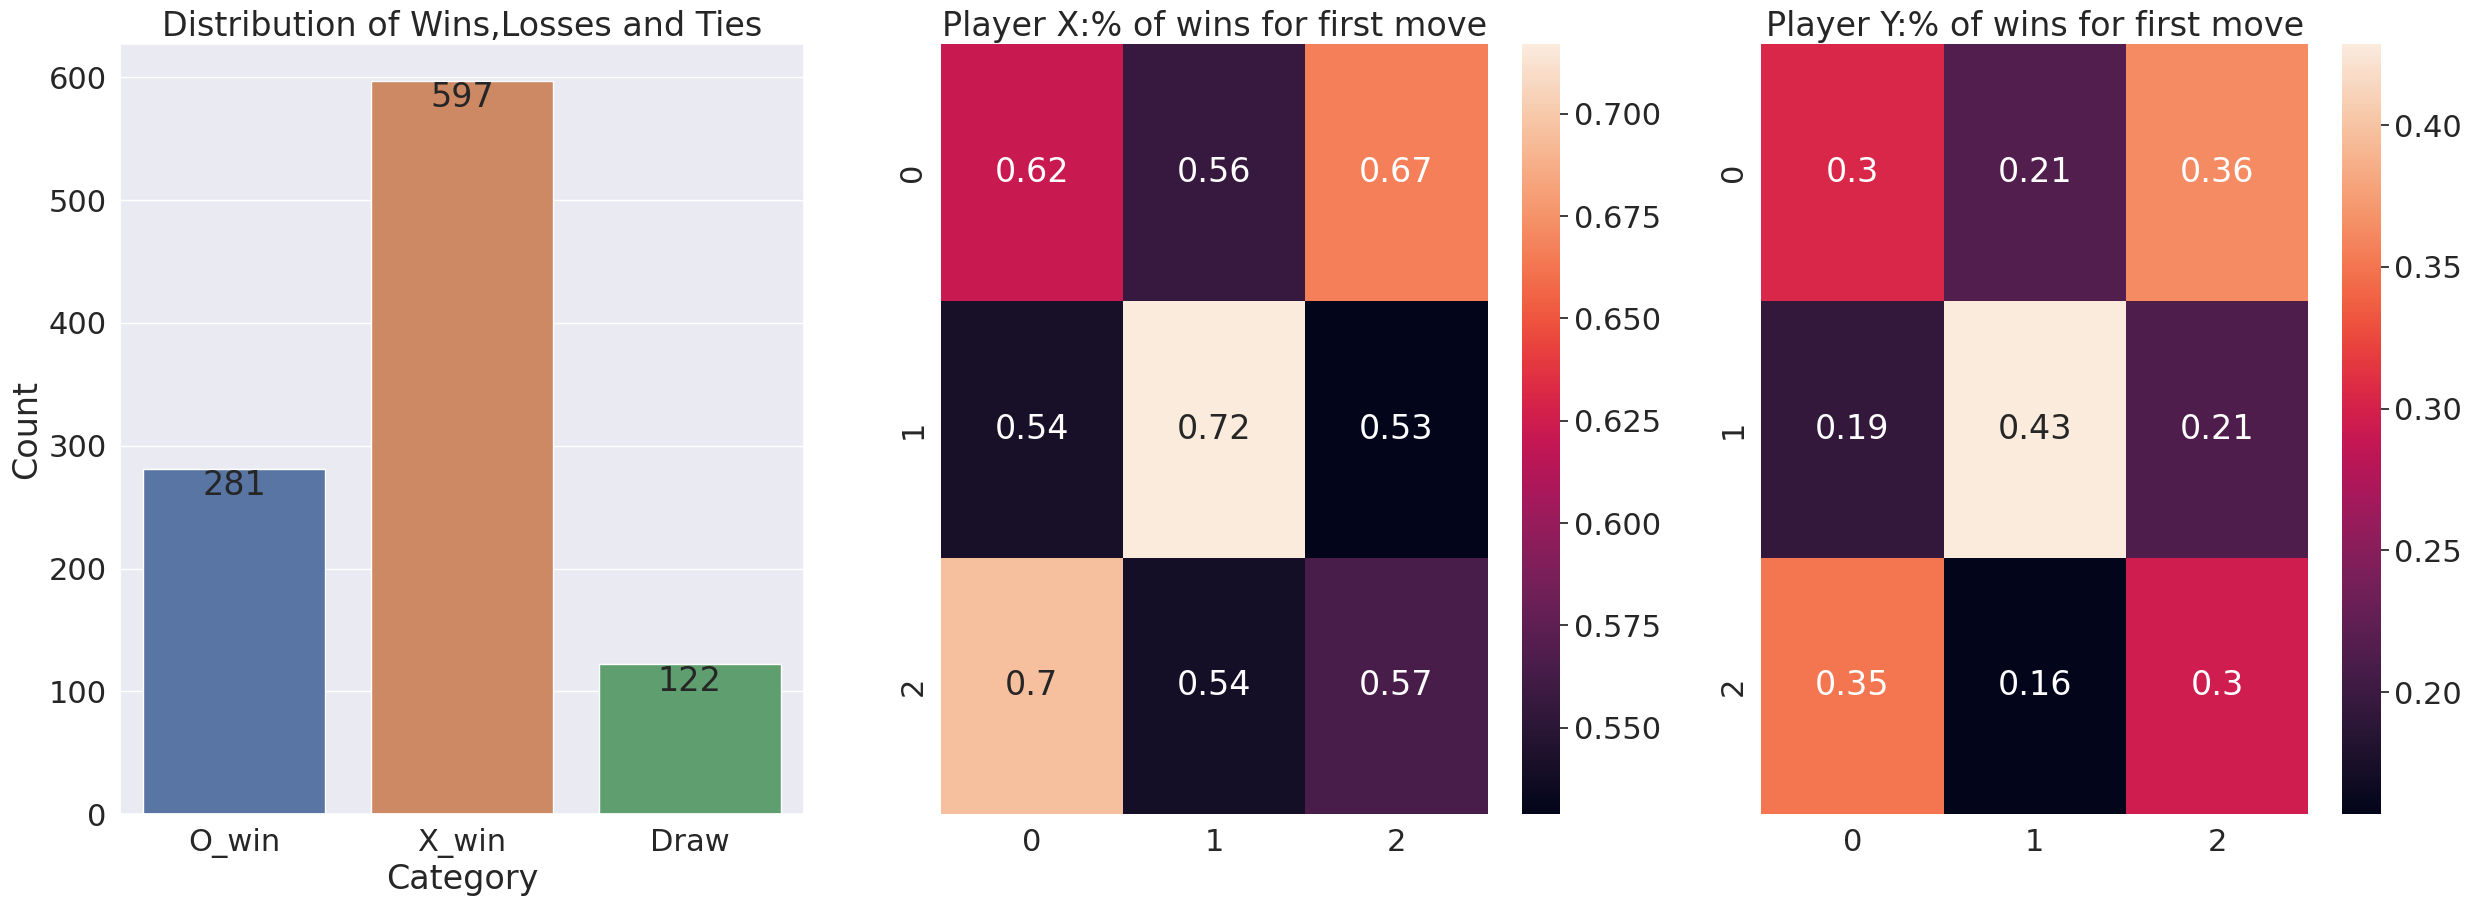

In [83]:
plot_results(results1)

We also see that given both players use random strategies: player X can play the first move in any of the squares without it affecting the win rate significantly.

For player O on the other hand, playing the first move in the central or corner square results in a significantly higher win rate.

## Optimal X vs Random O

In [84]:
results2 = play_games(1000,X_strategy=optimal_decision,O_strategy=random_decision)

100%|██████████| 1000/1000 [00:00<00:00, 4392.19it/s]


/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


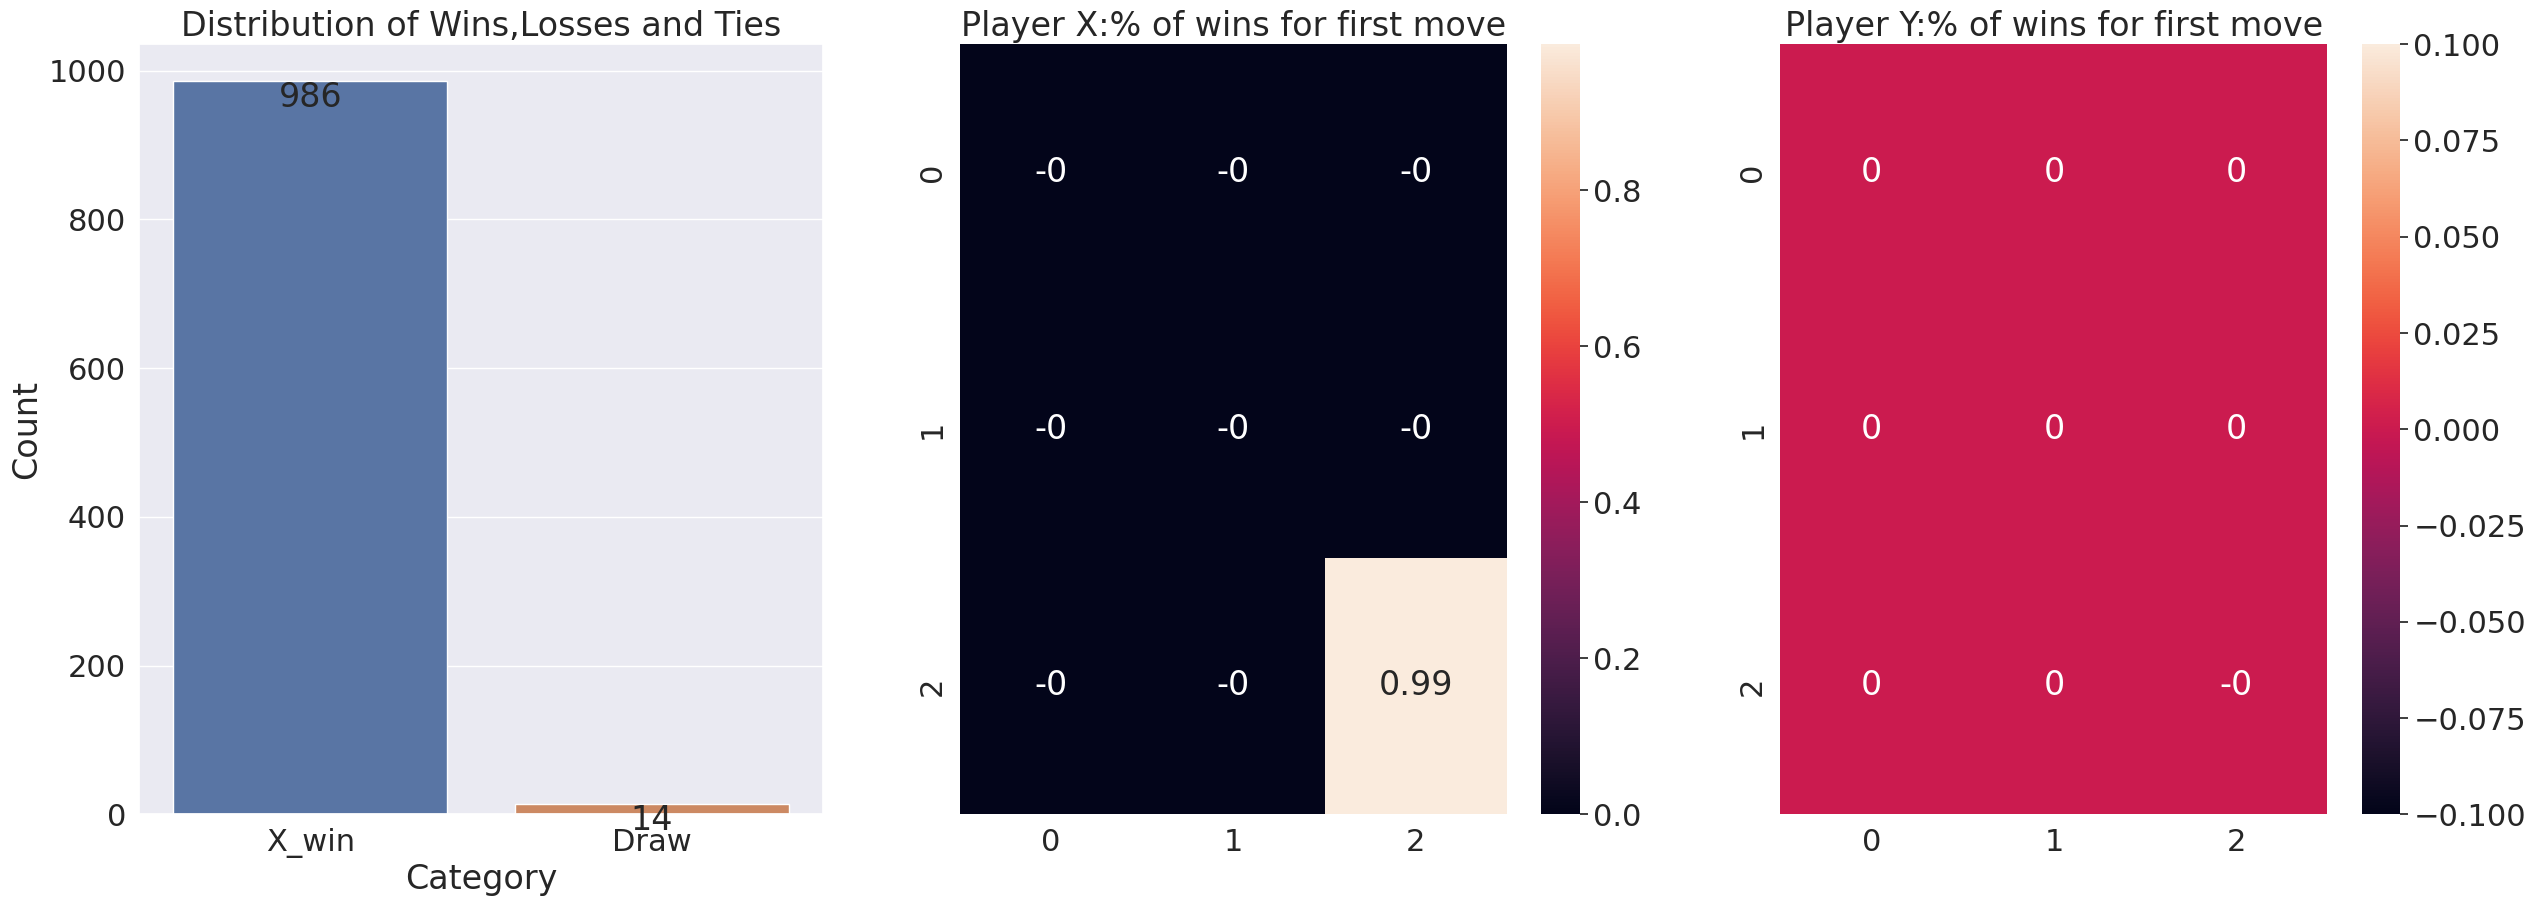

In [85]:
plot_results(results2)

When player X uses the optimal minimax strategy,it wins almost all the games.

It consistently picks the bottom right hand corner in the first move in every game.

## Random X vs Optimal O

In [86]:
results3 = play_games(1000,X_strategy=random_decision,O_strategy=optimal_decision)

100%|██████████| 1000/1000 [00:00<00:00, 3456.63it/s]


/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


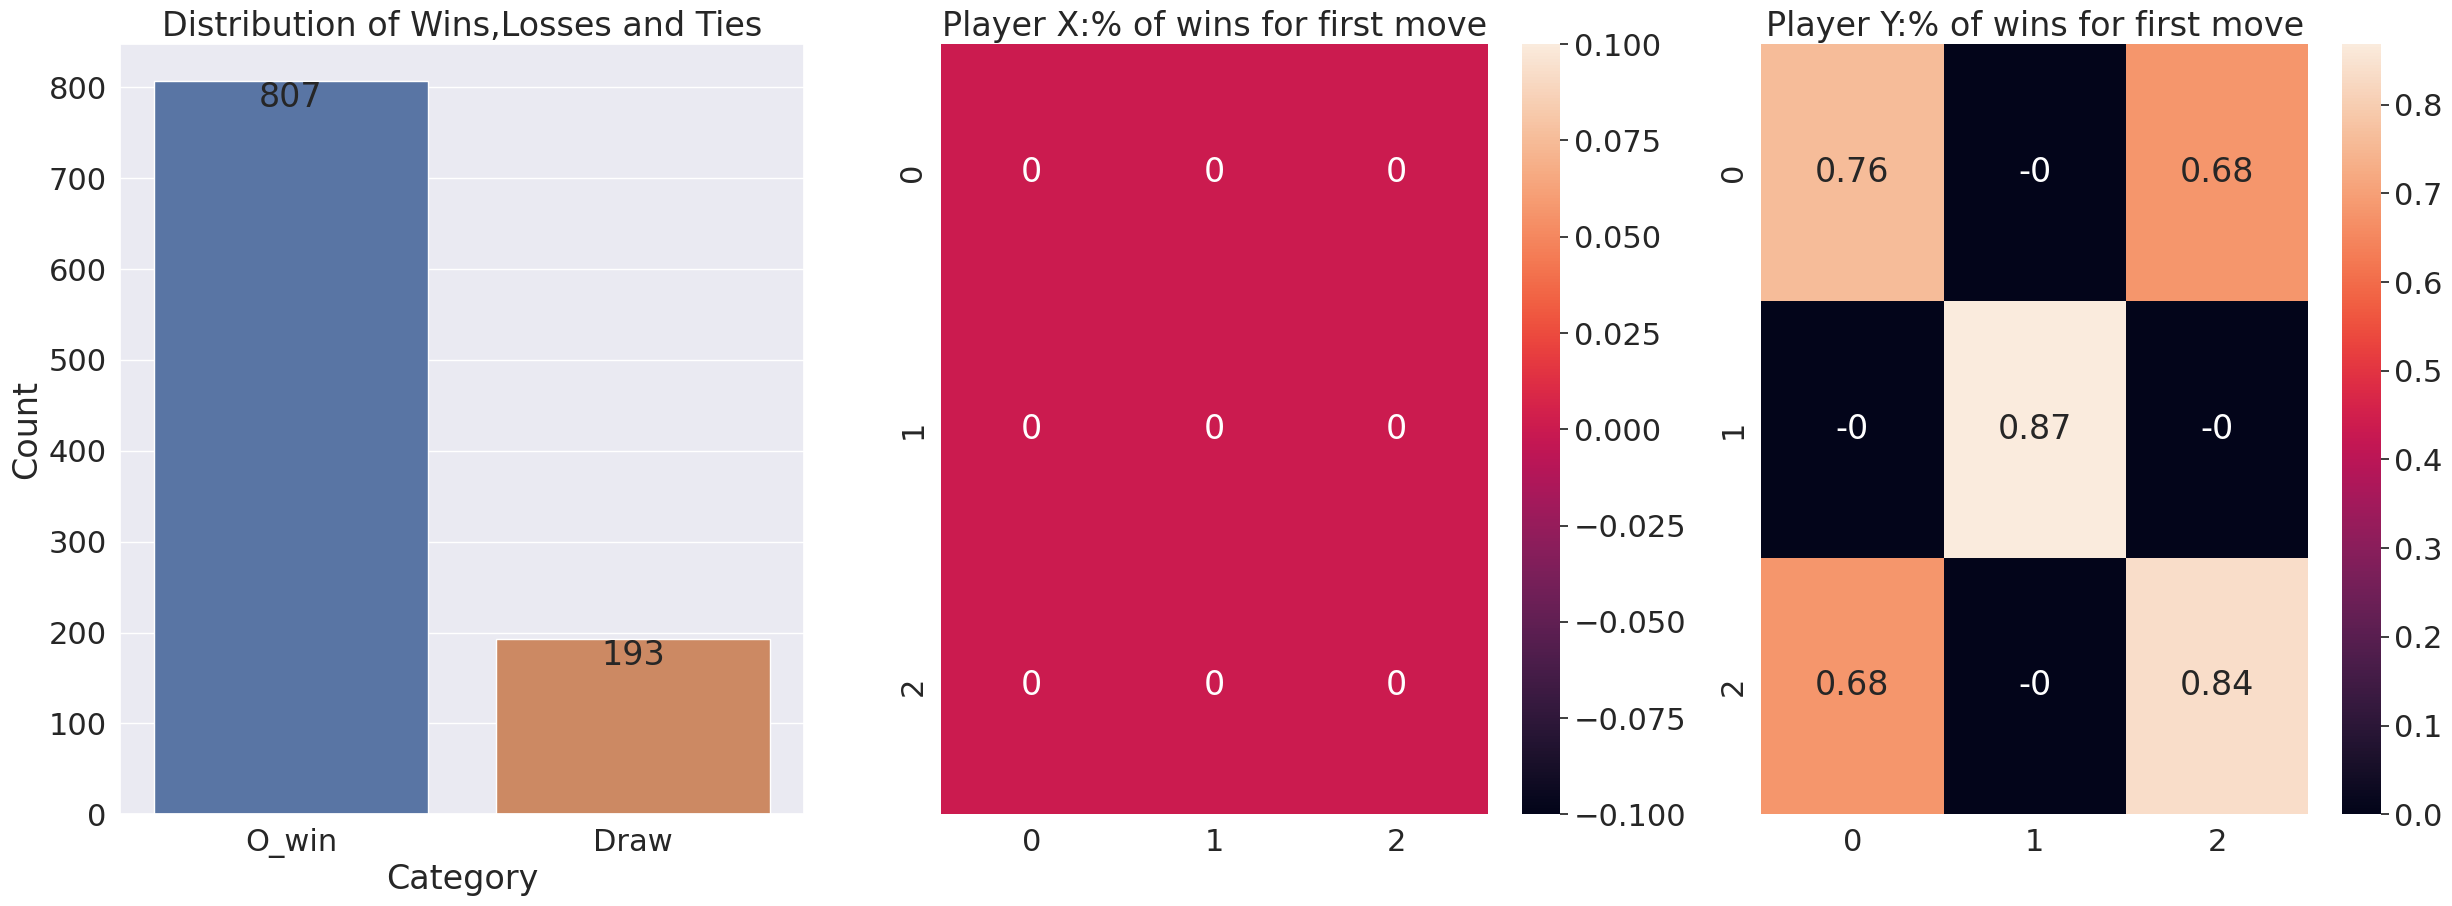

In [87]:
plot_results(results3)

In this case, O has a lower win rate given it does not have a fist move advantage.

The win rate is highest when Player O gets to occupy the central square in the first move.

## Optimal X vs Optimal O

In [88]:
results4 = play_games(100,X_strategy=optimal_decision,O_strategy=optimal_decision)

100%|██████████| 100/100 [00:00<00:00, 3136.54it/s]


/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nitish/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


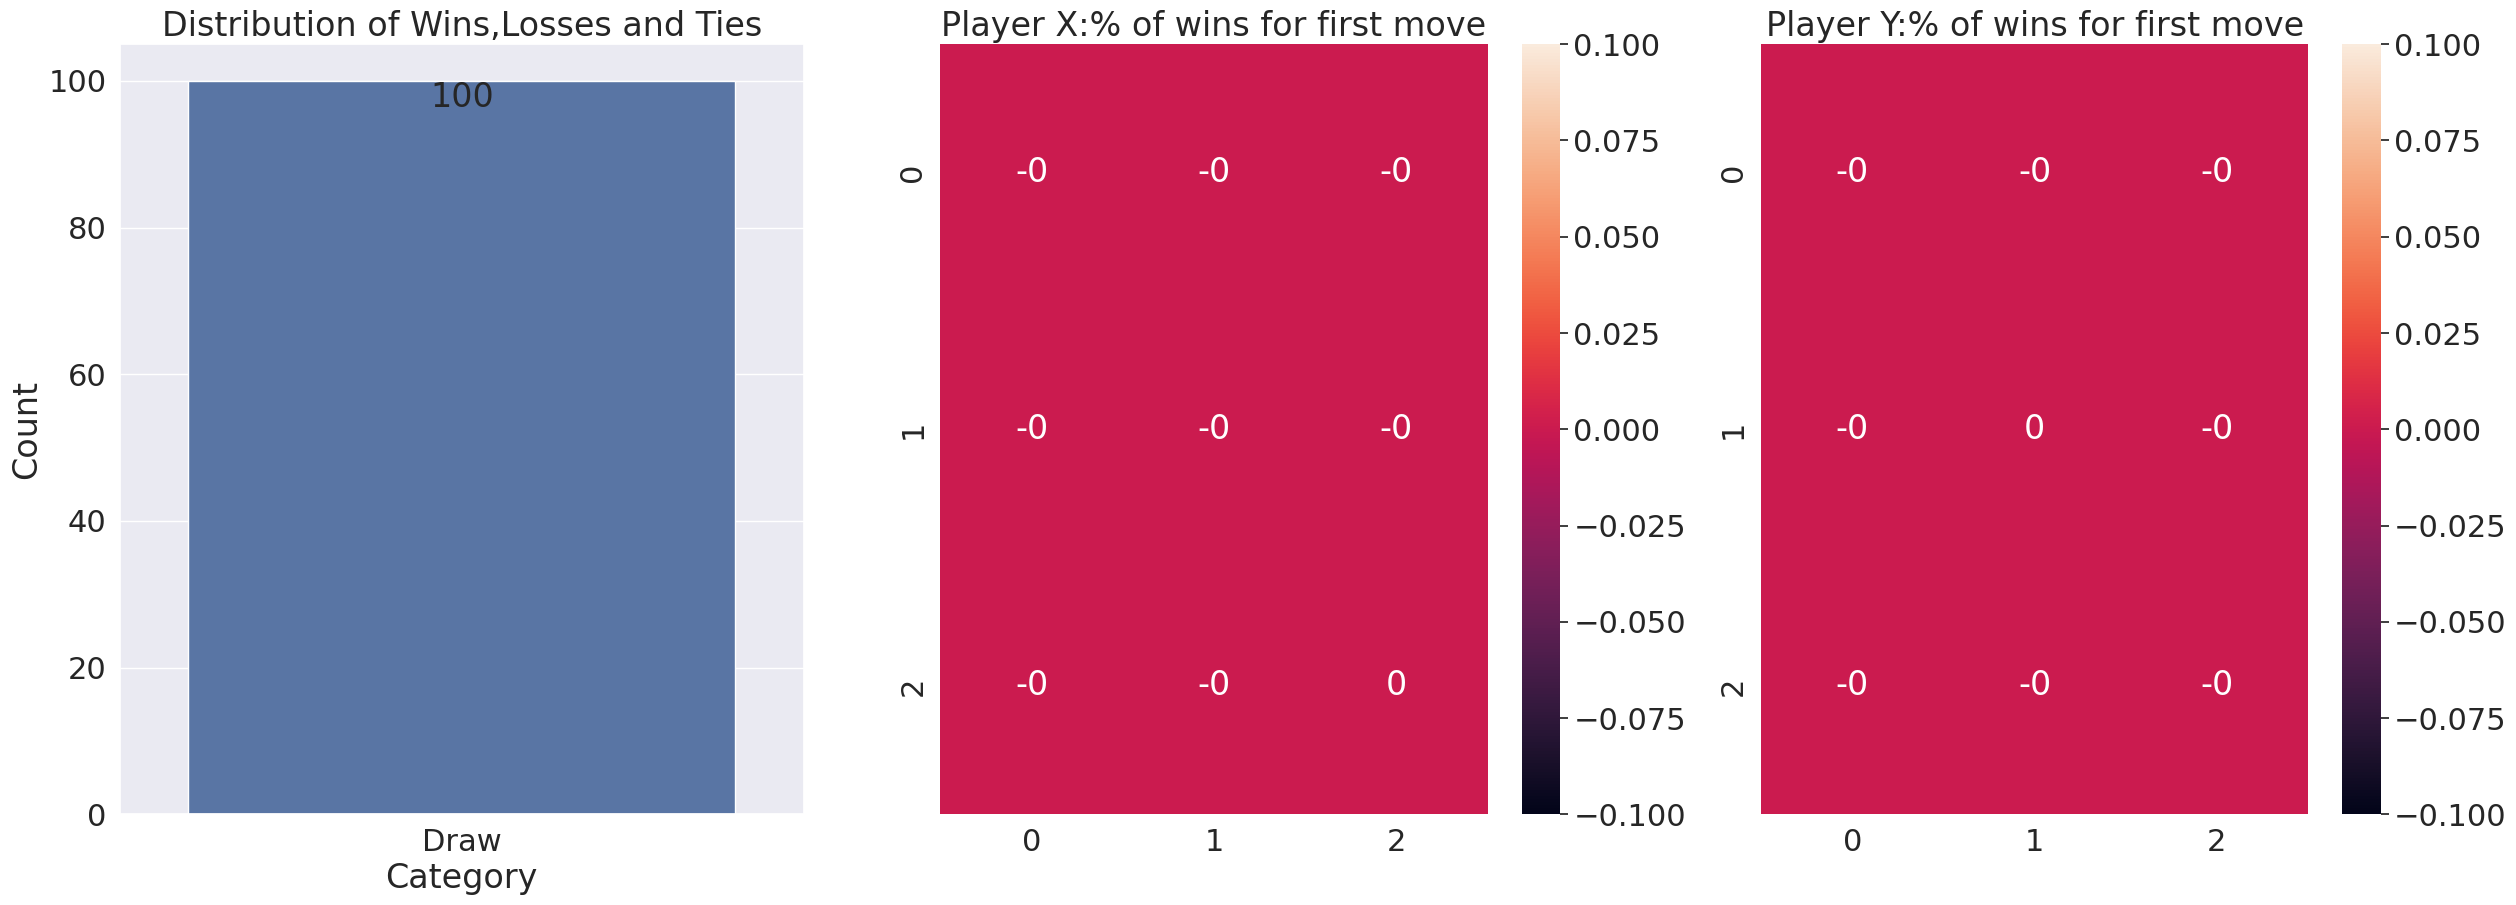

In [89]:
plot_results(results4)

When both players play the optimal strategy, all games end in ties.

## Live Demo

In [90]:
# Cell 45

def print_board(board):
    print("-------------")
    for i in range(3):
        print("|", end="")
        for j in range(3):
            print(" " + str(board[i][j]) + " |", end="")
        print("\n-------------")

def is_valid_move(board, row, col):
    if row < 0 or row >= 3 or col < 0 or col >= 3:
        return False
    if board[row][col] != 0:
        return False
    return True

def is_board_full(board):
    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                return False
    return True

def get_user_move(board):
    while True:
        try:
            row = int(input("Enter the row (0-2): "))
            col = int(input("Enter the column (0-2): "))
            if is_valid_move(board, row, col):
                return row, col
            else:
                print("Invalid move. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number.")

def play_game():
    board = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    print("Welcome to Tic-Tac-Toe!")
    print_board(board)
    
    while True:
        # User's turn
        row, col = get_user_move(board)
        board[row][col] = 1
        print_board(board)
        
        if is_terminal_state(board):
            print("You win!")
            break
        
        if is_board_full(board):
            print("It's a tie!")
            break
        
        # MiniMax's turn
        row, col = minimax(board, 2)
        board[row][col] = 2
        print("MiniMax's move:")
        print_board(board)
        
        if is_terminal_state(board):
            print("MiniMax wins!")
            break
        
        if is_board_full(board):
            print("It's a tie!")
            break

play_game()


Welcome to Tic-Tac-Toe!
-------------
| 0 | 0 | 0 |
-------------
| 0 | 0 | 0 |
-------------
| 0 | 0 | 0 |
-------------
-------------
| 1 | 0 | 0 |
-------------
| 0 | 0 | 0 |
-------------
| 0 | 0 | 0 |
-------------


NameError: name 'is_terminal_state' is not defined